https://www.datacamp.com/tutorial/fine-tuning-stable-diffusion-xl-with-dreambooth-and-lora

In [1]:
MODEL_NAME = "stabilityai/stable-diffusion-xl-base-1.0"
DATA_DIR = "images"
REPO_ID = "sdxl-lora-kenan"


In [2]:
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]

    w, h = imgs[0].size
    grid_w, grid_h = cols * w, rows * h
    grid = Image.new("RGB", size=(grid_w, grid_h))

    for i, img in enumerate(imgs):
        x = i % cols * w
        y = i // cols * h
        grid.paste(img, box=(x, y))

    return grid

import glob

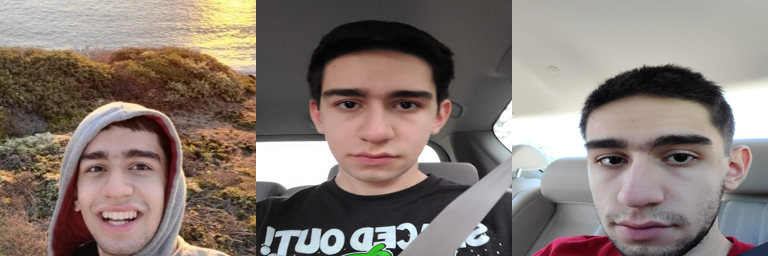

In [5]:
import os
imgs = [Image.open(f"images/{path}") for path in os.listdir("images")]
image_grid(imgs, 1, len(imgs))

In [7]:
!autotrain dreambooth --model $MODEL_NAME --project-name $PROJECT_NAME --image-path $DATA_DIR --prompt "A photo of Kenan taking a selfie." --resolution 1024 --batch-size 1 --num-steps 500 --gradient-accumulation 4 --lr 1e-4 --fp16 --gradient-checkpointing --push-to-hub 

usage: autotrain <command> [<args>] dreambooth [-h] [--revision REVISION]
                                               [--tokenizer TOKENIZER]
                                               --image-path IMAGE_PATH
                                               [--class-image-path CLASS_IMAGE_PATH]
                                               --prompt PROMPT
                                               [--class-prompt CLASS_PROMPT]
                                               [--num-class-images NUM_CLASS_IMAGES]
                                               [--class-labels-conditioning CLASS_LABELS_CONDITIONING]
                                               [--prior-preservation]
                                               [--prior-loss-weight PRIOR_LOSS_WEIGHT]
                                               --resolution RESOLUTION
                                               [--center-crop]
                                               [--train-text-encoder]
          

In [9]:
!pip install --upgrade bitsandbytes transformers accelerate peft -q
!pip install --upgrade git+https://github.com/huggingface/diffusers.git -q
# !wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora_sdxl.py


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autotrain-advanced 0.7.36 requires diffusers==0.27.2, but you have diffusers 0.28.0.dev0 which is incompatible.
autotrain-advanced 0.7.36 requires transformers==4.39.0, but you have transformers 4.39.1 which is incompatible.
whisperx 3.1.1 requires setuptools>=65, but you have setuptools 59.6.0 which is incompatible.


In [10]:
def image_grid(imgs, rows, cols, resize=256):

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

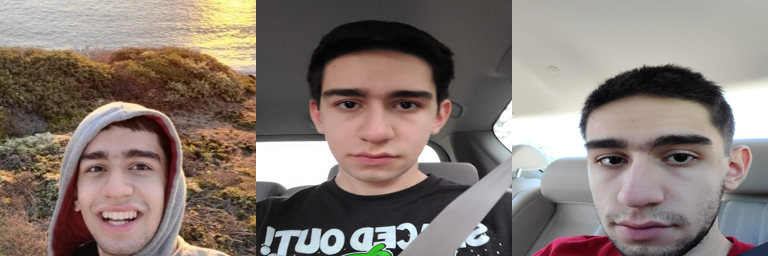

In [11]:
imgs = [Image.open(f"images/{path}") for path in os.listdir("images")]
image_grid(imgs, 1, len(imgs))

In [12]:
import requests
from transformers import AutoProcessor, BlipForConditionalGeneration
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# load the processor and the captioning model
blip_processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base",torch_dtype=torch.float16).to(device)

# captioning utility
def caption_images(input_image):
    inputs = blip_processor(images=input_image, return_tensors="pt").to(device, torch.float16)
    pixel_values = inputs.pixel_values

    generated_ids = blip_model.generate(pixel_values=pixel_values, max_length=50)
    generated_caption = blip_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_cap
tion

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [13]:
import glob  
from PIL import Image

# create a list of (Pil.Image, path) pairs
local_dir = "./images"
imgs_and_paths = [(path,Image.open(path)) for path in glob.glob(f"{local_dir}*.jpeg")]

ModuleNotFoundError: No module named 'path'